# AICE Associate 예상 문제 9회: 대출 승인 여부 예측

**과제: 고객 데이터 기반 대출 승인 여부 예측 AI 모델 개발**

**도메인: 금융**

**배경:**
금융 기관에서 대출 승인 심사는 리스크 관리의 핵심적인 부분입니다. 'AICE 캐피탈'의 리스크 관리팀은 과거 대출 신청 고객들의 데이터를 분석하여, 어떤 요인이 대출 승인 및 거절에 영향을 미치는지 파악하고자 합니다. 이를 바탕으로 신규 대출 신청 건에 대해 승인 가능성을 자동으로 예측하는 AI 모델을 개발하는 것이 목표입니다. 이 모델은 심사 과정의 효율성을 높이고, 일관성 있는 의사결정을 내리는 데 도움을 줄 것입니다.

**데이터셋 설명 (파일명: `9_loan_approval.csv`)**

* `employment_type`: 고용 형태
* `annual_income`: 연소득 (만원)
* `credit_score`: 신용 점수
* `loan_purpose`: 대출 목적
* `loan_amount`: 대출 신청 금액 (만원)
* `dti`: 부채 비율 (%)
* `years_employed`: 고용 기간 (년)
* `home_ownership`: 주택 소유 여부
* `delinquency_history`: 과거 연체 이력 유무
* **`loan_status`**: **예측 목표(Target)**, 대출 승인 여부 (1: 승인, 0: 거절)

--- 
#### **사전 실행 코드**
> 모든 문제를 풀기 전에 아래 코드를 실행해주세요.

In [141]:
# 데이터 분석 및 시각화에 필요한 기본 라이브러리들을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn 라이브러리에서 필요한 모듈들을 불러옵니다.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# TensorFlow Keras 라이브러리를 불러옵니다.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 재현성을 위해 랜덤 시드를 설정합니다.
# 특히 DNN 모델에서 일관된 결과값을 얻기 위해 중요합니다.
import random
seed_value = 2025
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
# 실제 시험에서는 random_state = 42 와 같이 설정하라고 지침이 나옵니다.

# 경고 메시지를 무시합니다.
import warnings
warnings.filterwarnings('ignore')

--- 
#### **문제 1.**

Scikit-learn 라이브러리의 `ensemble` 모듈에는 여러 개의 약한 학습기를 결합하여 성능을 높이는 앙상블 모델들이 포함되어 있습니다. `sklearn.ensemble` 모듈에서 `AdaBoostClassifier` 클래스를 임포트하는 코드를 작성하세요.

In [142]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 1**


* **상세 해설**

    `from 패키지.모듈 import 클래스` 구문을 사용하여 `sklearn.ensemble` 모듈에서 `AdaBoostClassifier` 클래스를 불러옵니다. AdaBoost는 이전 모델이 잘못 예측한 데이터에 가중치를 부여하여 다음 모델이 더 잘 맞추도록 하는 부스팅(Boosting) 계열의 앙상블 모델입니다.

In [143]:
from sklearn.ensemble import AdaBoostClassifier
# 실제 시험문제는 다양한 Classifier를 사용할 수 있다.

--- 
#### **문제 2.**

AI 모델링을 위해 분석할 데이터를 준비하고 기본적인 정보를 파악하려고 합니다. 아래 가이드에 따라 코드를 작성하세요.

1.  Pandas의 `read_csv` 함수를 사용하여 `9_loan_approval.csv` 파일을 읽어 데이터프레임 변수 `loan_df`에 할당하세요.
2.  `info()` 함수를 사용하여 `loan_df`의 요약 정보를 확인하여 결측치와 데이터 타입을 파악하세요.

In [144]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 2**


* **상세 해설**
  
    `pandas`의 `read_csv()` 함수로 데이터를 불러온 후, `info()` 메소드를 사용하여 데이터프레임의 전체적인 구조, 각 컬럼의 데이터 타입, 결측치 현황 등을 파악합니다. 실행 결과를 통해 여러 컬럼에 결측치가 존재함을 확인할 수 있습니다.

In [145]:
# '9_loan_approval.csv' 파일을 읽어 loan_df 변수에 저장합니다.
loan_df = pd.read_csv('./9_loan_approval_train.csv')

# 데이터프레임의 요약 정보 확인
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   employment_type      1738 non-null   object 
 1   annual_income        1742 non-null   float64
 2   credit_score         1736 non-null   float64
 3   loan_purpose         1741 non-null   object 
 4   loan_amount          1756 non-null   float64
 5   dti                  1751 non-null   float64
 6   years_employed       1743 non-null   float64
 7   home_ownership       1726 non-null   object 
 8   delinquency_history  1735 non-null   object 
 9   loan_status          1798 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 140.6+ KB


In [146]:
#### 임시 출력용 셀(답안 제출전 반드시 삭제) ####

# 1. 실제 데이터를 보고 싶으면 셀을 추가 해서 보고나서 추가한 셀은 제출 전에 삭제해야 한다.
print(loan_df.head())
# ---> 문자열 명목형 변수 3개, Boolean형 변수(Yes, No) 1개가 있음을 알 수 있다.

# 2. 결측치가 있는지 확인한다.
print(loan_df.isnull().sum())
# ---> 결측치가 여기저기 꽤 많음을 알 수 있다.

# Boolean형(True/False) 컬럼, 문자열 Yes/No 컬럼은 인코딩시 주의 필요하다.
# 또한 대/소문자 구분이 잘 되어 있는지 확인할 필요가 있다.
print(loan_df.delinquency_history.unique())
# ---> 'Yes', 'No'로 잘 구분되어 있으나 결측치가 있음을 알 수 있다.

# 나머지 명목형 변수들도 고유값을 확인해 본다.
print(loan_df.employment_type.unique())
print(loan_df.loan_purpose.unique())
print(loan_df.home_ownership.unique())
print(loan_df.loan_status.unique())
# target이 되는 y값 컬럼인 loan_status 는 0, 1 숫자로 잘 구분되어 있고 결측치가 없음을 알 수 있다.

  employment_type  annual_income  credit_score loan_purpose  loan_amount  \
0              무직        17718.0         603.0           주택        864.0   
1             정규직        19466.0         875.0           기타       9285.0   
2             정규직         3919.0         326.0          생활비       3907.0   
3             계약직        18853.0         543.0           사업       6009.0   
4             자영업        13717.0         916.0          생활비       4588.0   

     dti  years_employed home_ownership delinquency_history  loan_status  
0   31.0             NaN             자가                  No            1  
1  320.0            18.0             월세                  No            1  
2  199.0            21.0             자가                  No            1  
3  158.0            18.0             자가                  No            1  
4  424.0             7.0             월세                  No            1  
employment_type        60
annual_income          56
credit_score           62
loan_purpose   

--- 
#### **문제 3.**

`신용점수(credit_score)`가 `대출승인여부(loan_status)`에 따라 어떻게 다른 분포를 보이는지 시각적으로 탐색하고자 합니다.  
`seaborn`의 `violinplot`을 사용하여 두 그룹의 `credit_score` 분포를 비교하세요.

* **x축**: `loan_status`
* **y축**: `credit_score`
* **데이터**: `loan_df`

In [147]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 3**


* **상세 해설**
  
    `violinplot`은 `boxplot`과 데이터의 밀도 그래프를 합친 형태로, 각 그룹의 데이터 분포를 더 상세하게 보여줍니다. `x`축에 `loan_status`, `y`축에 `credit_score`를 설정하면, 대출이 승인된 그룹(1)의 신용 점수 분포가 거절된 그룹(0)보다 전반적으로 더 높은 쪽에 치우쳐 있음을 시각적으로 확인할 수 있습니다.

<Axes: xlabel='loan_status', ylabel='credit_score'>

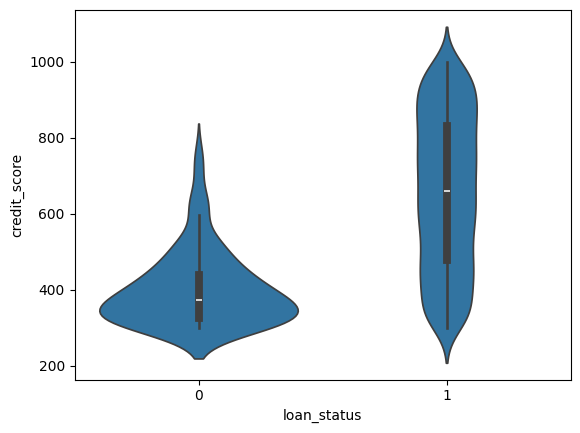

In [148]:
sns.violinplot(data=loan_df, x='loan_status', y='credit_score')

<Axes: >

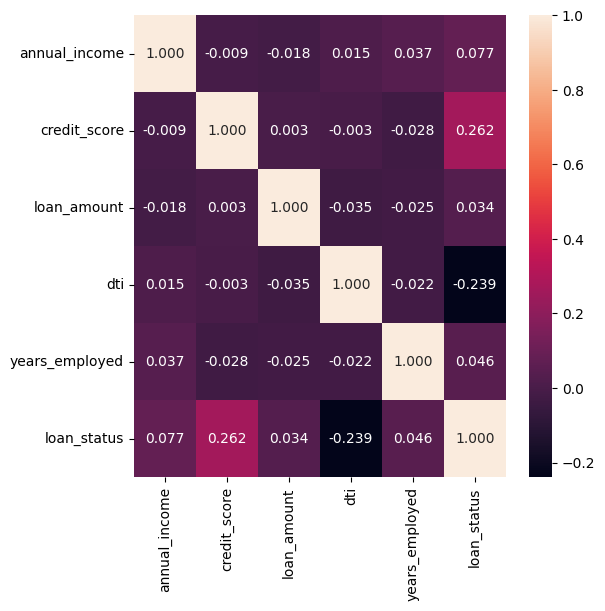

In [149]:
# 상관관계 히트맵이 출제될 수도 있다.
# 주의 : 수치형 컬럼만 선택해야 한다.
num_cols = loan_df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(6,6))
corr_mat = loan_df[num_cols].corr()
sns.heatmap(corr_mat, annot=True, fmt='.3f')

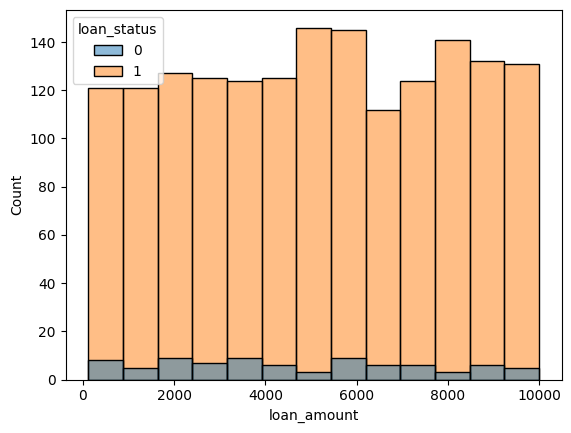

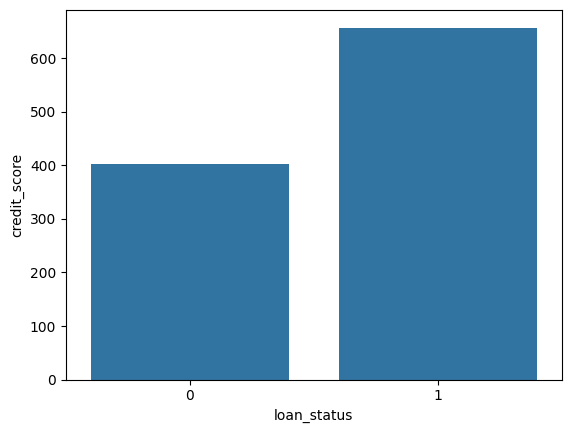

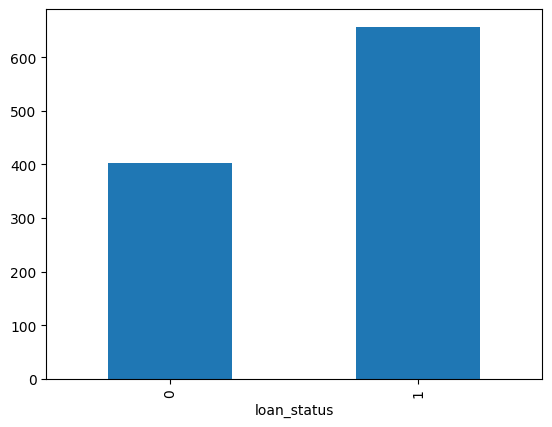

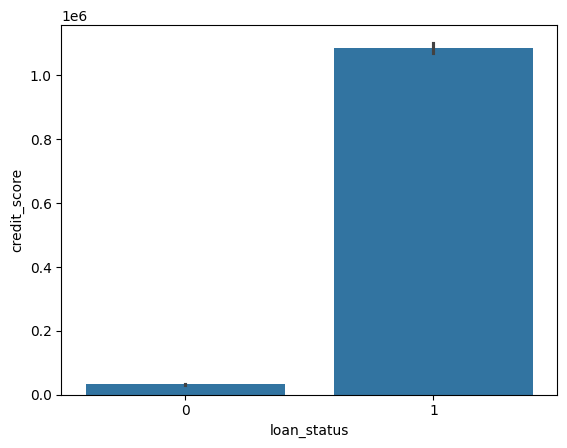

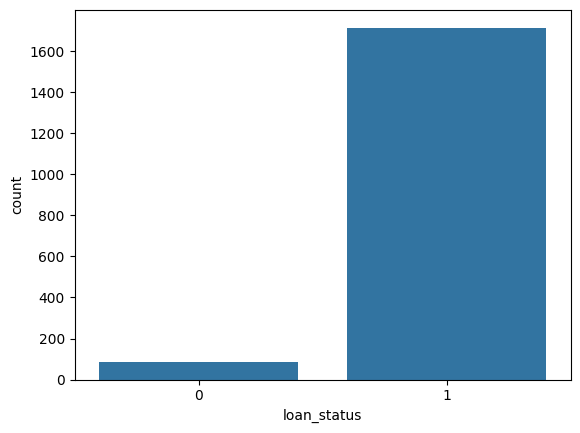

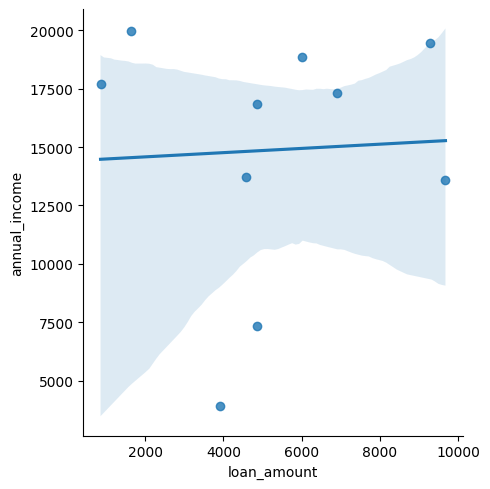

In [ ]:
# 실제 시험에는 다양한 플롯 시각화를 요구한다. 여러가지 타입의 차트를 그려보면서 익숙해져야 한다.

# histogram 은 분포를 나타낸다.
sns.histplot(data=loan_df, x='loan_amount', hue='loan_status')
plt.show()
# barplot 은 평균값을 막대그래프로 나타낸다.
sns.barplot(data=loan_df, x='loan_status', y='credit_score', errorbar=None)
plt.show()
# sns.barplot 같은 그래프
loan_df.groupby('loan_status')['credit_score'].mean().plot(kind='bar')
plt.show()
# barplot 을 합계로 나타내려면 아래와 같이 한다.
sns.barplot(data=loan_df, x='loan_status', y='credit_score', estimator=np.sum)
plt.show()
# countplot 은 각 카테고리별 빈도수를 막대그래프로 나타낸다.
sns.countplot(data=loan_df, x='loan_status')
plt.show()
# 상위 10개 데이터로 회귀선을 포함한 산점도 그리기
sns.lmplot(data=loan_df[0:10], x='loan_amount', y='annual_income')
plt.show()

--- 
#### **문제 4.**

`주택소유여부(home_ownership)`에 따른 대출 승인 고객의 비율을 확인하려고 합니다.  
`pandas`의 `crosstab` 함수를 사용하여 두 변수의 교차표를 생성하고, `normalize='index'` 옵션을 사용하여 각 주택 소유 그룹 내에서 대출 승인/거절 비율을 계산하세요.

In [151]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 4**


* **상세 해설**
  
    `pandas`의 `crosstab` 함수는 두 변수의 빈도를 표 형태로 만들어 줍니다. 여기에 `normalize='index'` 옵션을 추가하면, 각 행(index)의 합이 1이 되도록 비율로 변환해줍니다. 이를 통해 '자가', '월세', '전세' 각 그룹 내에서 대출이 승인(1)되거나 거절(0)된 고객의 비율을 쉽게 비교할 수 있습니다.

In [152]:
# 주택소유여부와 대출승인여부의 교차표 생성 (비율 기준)
cross_table_ratio = pd.crosstab(loan_df['home_ownership'], loan_df['loan_status'], normalize='index')
cross_table_ratio

loan_status,0,1
home_ownership,,
월세,0.065858,0.934142
자가,0.041528,0.958472
전세,0.032907,0.967093


--- 
#### **문제 5.**

`고용형태(employment_type)`별로 `연소득(annual_income)`과 `대출금액(loan_amount)`의 평균을 비교하고자 합니다.  
`groupby()`를 사용하여 데이터를 `employment_type`으로 그룹화하고, 두 변수의 평균을 계산하세요.

In [153]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 5**


* **상세 해설**
  
    `groupby('employment_type')`를 사용하여 데이터를 고용 형태별로 그룹화합니다. 그 후, 분석 대상 컬럼인 `['annual_income', 'loan_amount']`를 선택하고 `.mean()`으로 각 그룹의 평균값을 계산합니다.

In [154]:
# 'employment_type'으로 그룹화하여 연소득과 대출금액의 평균을 계산합니다.
employment_avg = loan_df.groupby('employment_type')[['annual_income', 'loan_amount']].mean()
employment_avg

,annual_income,loan_amount
employment_type,,
계약직,10451.086207,5082.815864
무직,11349.710059,5054.538922
자영업,10757.991150,5085.130058
정규직,11139.076087,5127.108173


In [155]:
# 조건으로 검색하는 문제는 매회 출제된다.
# loan_amount >= 9000 이고 loan_status == 1 인 데이터의 개수를 출력
# 주의 : 결측치가 제거되기 전에는 .count()는 결측치를 제외하므로 주의한다. .size 는 결측치 포함 전체 갯수 반환
print(loan_df[(loan_df['loan_amount'] >= 9000) & (loan_df['loan_status'] == 1)].shape[0])    # dataframe 의 shape 으로 데이터 갯수 확인
print(loan_df[(loan_df['loan_amount'] >= 9000) & (loan_df['loan_status'] == 1)].index.size)    # 인덱스 크기로 데이터 갯수 확인
print(loan_df[(loan_df['loan_amount'] >= 9000) & (loan_df['loan_status'] == 1)].loan_status.value_counts())    # value_counts()는 Series 에서 각 값의 출현 빈도를 반환한다.
# 위 검색결과는 (당연하지만)loan_status 가 모두 1이며 171건이 있다.

171
171
loan_status
1    171
Name: count, dtype: int64


--- 
#### **문제 6.**

모델링을 위해 데이터의 결측치를 처리하려고 합니다. 아래 가이드에 따라 결측치를 처리하고, 결과를 `loan_pre` 변수에 저장하세요.

1.  `loan_df` 데이터프레임을 복사하여 `loan_pre`를 생성합니다.
2.  수치형 컬럼인 `annual_income`, `credit_score`, `loan_amount`, `dti`, `years_employed`의 결측치는 각 컬럼의 **중앙값(median)** 으로 채우세요.
3.  범주형 컬럼인 `employment_type`, `loan_purpose`, `home_ownership`, `delinquency_history`의 결측치는 각 컬럼의 **최빈값(mode)** 으로 채우세요.

In [156]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 6**


* **상세 해설**
  
    `copy()`로 데이터프레임을 복사합니다. 수치형 컬럼들의 결측치는 이상치의 영향을 덜 받는 중앙값(`.median()`)으로, 범주형 컬럼들의 결측치는 가장 자주 나타나는 값인 최빈값(`.mode()[0]`)으로 채우는 것은 일반적인 전처리 전략입니다. 각 컬럼의 데이터 타입에 맞는 적절한 통계량을 사용하여 결측치를 처리합니다.

In [157]:
# 원본 보존을 위해 데이터프레임을 복사합니다.
loan_pre = loan_df.copy()

# 1. 수치형 컬럼 결측치를 중앙값으로 채우기
numeric_cols = ['annual_income', 'credit_score', 'loan_amount', 'dti', 'years_employed']
for col in numeric_cols:
    median_val = loan_pre[col].median()
    loan_pre[col].fillna(median_val, inplace=True)

# 2. 범주형 컬럼 결측치를 최빈값으로 채우기
categorical_cols = ['employment_type', 'loan_purpose', 'home_ownership', 'delinquency_history']
for col in categorical_cols:
    mode_val = loan_pre[col].mode()[0]      # .mode() 는 Series 를 반환하므로 [0] 으로 값을 추출해야 한다.
    loan_pre[col].fillna(mode_val, inplace=True)
    
# 전처리 결과 확인
loan_pre.isnull().sum()

employment_type        0
annual_income          0
credit_score           0
loan_purpose           0
loan_amount            0
dti                    0
years_employed         0
home_ownership         0
delinquency_history    0
loan_status            0
dtype: int64

In [ ]:
# 같은 답안이지만 다른 방법
loan_pre = loan_df.copy()

# 주의 : 수동지정하지 않을 경우 이렇게 할 수도 있지만, 예측해야 할 target y컬럼(loan_status)도 포함되므로 주의한다.
num_cols = loan_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = loan_df.select_dtypes(include=[object]).columns.tolist()
num_cols.remove('loan_status')  # target 컬럼(loan_status)는 num_col 에서 제외해야 한다.

# 시험에서는 보통 결측치 처리할 컬럼을 지정해준다.
num_cols = ['annual_income', 'credit_score', 'loan_amount', 'dti', 'years_employed']
cat_cols = ['employment_type', 'loan_purpose', 'home_ownership', 'delinquency_history']

# 위 처럼 for 문을 사용하지 않고 한줄로도 해결된다.
loan_pre[num_cols] = loan_pre[num_cols].fillna(loan_pre[num_cols].median())
loan_pre[cat_cols] = loan_pre[cat_cols].fillna(loan_pre[cat_cols].mode().iloc[0])   # .mode()는 DataFrame 반환, .iloc[0]로 첫번째 행 선택
print(loan_pre.isnull().sum())

# 참고 : 컬럼 하나씩 결측치 대치하는 다른 방법
# df.fillna({'col_name':df['col_name'].median()}, inplace=True)
# df['col_name'].fillna(df['col_name'].mean(), inplace=True)
# inplace=True 사용하지 않고 df = df.fillna(...) 로 해도 좋다.

# 결측치 삭제
# df.dropna() 행 삭제(전체 컬럼 탐색)
# df.dropna(how='all') 행 전체 값이 null 인 경우 그 행을 삭제
# df.dropna(subset='col3') col3 만 탐색해서 null 인 행 삭제
# df.isna().sum() 결측치 처리한 결과 확인

employment_type        0
annual_income          0
credit_score           0
loan_purpose           0
loan_amount            0
dti                    0
years_employed         0
home_ownership         0
delinquency_history    0
loan_status            0
dtype: int64


In [ ]:
# 이상치 제거 - IQR 방법
# Q1 = loan_pre[numeric_cols].quantile(0.25)
# Q3 = loan_pre[numeric_cols].quantile(0.75)
# IQR = Q3 - Q1
# loan_pre = loan_pre[((loan_pre[numeric_cols] >= (Q1 - 1.5 * IQR)) & (loan_pre[numeric_cols] <= (Q3 + 1.5 * IQR))).all(axis=1)]
# .all(axis=1) : 행 방향으로 모두 True 면 True 반환
# 다른 표현 방법(~ : not 사용)
# loan_pre = loan_pre[~((loan_pre[numeric_cols] < (Q1 - 1.5 * IQR)) | (loan_pre[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# .any(axis=1) : 행 방향으로 하나라도 True 면 True 반환

# 시험문제는 보통 특정 컬럼값의 이상치를 처리(대치, 삭제)하라고 출제된다.

# 이상치 삭제(특정 컬럼 기준)
# Q1 = loan_pre['annual_income'].quantile(0.25)
# Q3 = loan_pre['annual_income'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# loan_pre = loan_pre[(loan_pre['annual_income'] >= lower_bound) & (loan_pre['annual_income'] <= upper_bound)]

# 이상치 대치(특정 컬럼 기준)
# median_income = loan_pre['annual_income'].median()
# loan_pre.loc[loan_pre['annual_income'] < lower_bound, 'annual_income'] = median_income
# loan_pre.loc[loan_pre['annual_income'] > upper_bound, 'annual_income'] = median_income


--- 
#### **문제 7.**

모델이 이해할 수 있도록 범주형 데이터를 수치형으로 변환하려고 합니다. 아래 가이드에 따라 두 가지 다른 방식으로 인코딩을 수행하세요.

1.  값이 두 개인 `home_ownership`과 `delinquency_history` 컬럼은 `sklearn.preprocessing`의 `LabelEncoder`를 사용하여 **레이블 인코딩**을 수행하세요.
2.  값이 여러 개인 `employment_type`과 `loan_purpose` 컬럼은 `pandas`의 `get_dummies()`를 사용하여 **원-핫 인코딩**을 수행하세요.
3.  모든 변환은 `loan_pre` 데이터프레임에 직접 적용하세요.

In [160]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 7**


* **상세 해설**
  
    값이 두 개인 범주형 컬럼은 `LabelEncoder`를 사용하여 0과 1로 간단하게 변환합니다. 값이 여러 개인 범주형 컬럼은 `get_dummies()`를 사용하여 각 카테고리를 별도의 컬럼으로 만들어주는 원-핫 인코딩을 수행합니다. 이처럼 컬럼의 특성에 따라 다른 인코딩 방식을 적용하는 것이 중요합니다.

In [161]:
# 답안 정정을 위해 먼저 복사본을 만들어둔다.
loan_enc = loan_pre.copy()

# 1. 레이블 인코딩
le = LabelEncoder()
loan_pre['home_ownership'] = le.fit_transform(loan_pre['home_ownership'])
loan_pre['delinquency_history'] = le.fit_transform(loan_pre['delinquency_history'])

# 2. 원-핫 인코딩
loan_pre = pd.get_dummies(loan_pre, columns=['employment_type', 'loan_purpose'])

# 변환 결과 확인
loan_pre.head()

,annual_income,credit_score,loan_amount,dti,years_employed,home_ownership,delinquency_history,loan_status,employment_type_계약직,employment_type_무직,employment_type_자영업,employment_type_정규직,loan_purpose_기타,loan_purpose_사업,loan_purpose_생활비,loan_purpose_주택
0,17718.0,603.0,864.0,31.0,15.0,1,0,1,False,True,False,False,False,False,False,True
1,19466.0,875.0,9285.0,320.0,18.0,0,0,1,False,False,False,True,True,False,False,False
2,3919.0,326.0,3907.0,199.0,21.0,1,0,1,False,False,False,True,False,False,True,False
3,18853.0,543.0,6009.0,158.0,18.0,1,0,1,True,False,False,False,False,True,False,False
4,13717.0,916.0,4588.0,424.0,7.0,0,0,1,False,False,True,False,False,False,True,False


## 중요함

위 풀이는 틀렸다.
- delinquency_history 는 ['No' 'Yes' nan]
- employment_type 은 ['무직' '정규직' '계약직' '자영업' nan]
- loan_purpose 는 ['주택' '기타' '생활비' '사업' nan]
- home_ownership 은 ['자가' '월세' '전세' nan]

이므로 값이 2개인 범주형 컬럼은 delinquency_history 밖에 없다(결측치는 앞에서 이미 대치됨).

위 답안처럼 실행하면 home_ownership 은 (0, 1, 2) 3종류의 값이 된다.

따라서, delinquency_history 만 LabelEncoder 로 인코딩할 수 있다.

나머지는 .get_dummies() 로 원-핫 인코딩하는게 맞다.

.get_dummies() 는 범주형 컬럼에 자동으로 적용된다(수치형 컬럼은 적용 제외됨)

- 그러나, 공식 메뉴얼에서는 target y 컬럼에만 LabelEncoder 를 사용하는것을 추천한다.
- 이유는 target y 값이 0,1 이 아니라 다른 값이 생성될 가능성 때문이다.
- 여기 이 문제에서는 y 값이 다행히 결측치도 없고 0, 1로만 구성되어 있지만,
- y 값 컬럼은 반드시 값의 종류 수와 결측치 유무를 확인하고 안전하게 .replace({'Yes':1, 'No':0}) 한 뒤에
- 그 다음에 결측치 행들을 제거해야 한다.  왜? 예측해야 할 y 값을 최빈값으로 fill 해주는 것은 말이 안된다.
- 또 주의해야 할것이, .map() 과 .replace() 는 다르다. map은 key를 찾지 못하면 NaN 을 반환한다.
- (예시) unit 컬럼에 metres, feet 두 종류의 값이 있다면, 
- df['unit'] = df['unit'].replace({'feet':'metres'})  # 기존 metres 는 유지함.
- df['unit'] = df['unit'].map({'feet':'metres'})      # 기존 metres 는 NaN 으로 변경됨.



In [162]:
# 1. 레이블 인코딩
le = LabelEncoder()
loan_enc['delinquency_history'] = le.fit_transform(loan_enc['delinquency_history'])

# 2. 원-핫 인코딩
loan_enc = pd.get_dummies(loan_enc)
# drop_first=True 옵션은 시험문제에서 잘 사용하지 않는다.
# 왜냐하면, train/valid 데이터셋에는 있지만 test 데이터셋에는 없는 값이 존재할 수 있으므로 주의해야 한다.
# 이것을 잘 이해하지 못하면, 시험 후반부에 DNN 모델훈련 후 test 셋으로 예측값 산정시 반드시 오류가 발생한다.

# 변환 결과 확인
loan_enc.head()

,annual_income,credit_score,loan_amount,dti,years_employed,delinquency_history,loan_status,employment_type_계약직,employment_type_무직,employment_type_자영업,employment_type_정규직,loan_purpose_기타,loan_purpose_사업,loan_purpose_생활비,loan_purpose_주택,home_ownership_월세,home_ownership_자가,home_ownership_전세
0,17718.0,603.0,864.0,31.0,15.0,0,1,False,True,False,False,False,False,False,True,False,True,False
1,19466.0,875.0,9285.0,320.0,18.0,0,1,False,False,False,True,True,False,False,False,True,False,False
2,3919.0,326.0,3907.0,199.0,21.0,0,1,False,False,False,True,False,False,True,False,False,True,False
3,18853.0,543.0,6009.0,158.0,18.0,0,1,True,False,False,False,False,True,False,False,False,True,False
4,13717.0,916.0,4588.0,424.0,7.0,0,1,False,False,True,False,False,False,True,False,True,False,False


--- 
#### **문제 8.**

훈련과 검증에 사용할 데이터셋을 분리하려고 합니다.  
`loan_status` 컬럼을 label `y`로, 나머지 컬럼들을 feature `X`로 할당한 후 훈련 데이터셋과 검증 데이터셋으로 분리하는 코드를 작성하세요.

* **대상 데이터셋**: `loan_pre` (7번 문제까지 처리 완료된)
* **훈련:검증 데이터 비율**: 70:30
* **`random_state`**: 2024
* **추가 옵션**: `stratify=y`를 사용하여 타겟 변수의 분포를 유지

In [163]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 8**


* **상세 해설**
  
    `drop()`을 사용하여 `loan_status` 컬럼을 제외한 나머지를 `X`로, `loan_status` 컬럼을 `y`로 분리합니다. `train_test_split` 함수를 사용하는데, `stratify=y` 옵션을 추가하여 훈련 데이터와 검증 데이터의 대출 승인 비율(0과 1의 비율)이 원본 데이터와 동일하게 유지되도록 합니다. 이는 분류 문제, 특히 데이터가 불균형할 때 모델의 성능을 공정하게 평가하기 위해 매우 중요한 옵션입니다.

In [164]:
# Feature(X)와 Label(y)을 분리합니다.
#X = loan_pre.drop('loan_status', axis=1)
#y = loan_pre['loan_status']
X = loan_enc.drop('loan_status', axis=1)    # 답안 수정
y = loan_enc['loan_status']                 # 답안 수정

# 훈련 데이터와 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed_value, stratify=y)

# 분리 결과 확인
print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))

loan_status
1    0.9531
0    0.0469
Name: proportion, dtype: float64
loan_status
1    0.953704
0    0.046296
Name: proportion, dtype: float64


--- 
#### **문제 9.**

수치형 데이터들의 단위를 맞춰주기 위해 데이터 스케일링을 진행합니다.  
평균을 0, 표준편차를 1로 변환하는 `StandardScaler`를 사용하여 훈련 데이터와 검증 데이터의 Feature(`X_train`, `X_valid`)를 스케일링하는 코드를 작성하세요.

* 훈련 데이터에는 `fit_transform()`을, 검증 데이터에는 `transform()`을 적용하세요.
* 스케일링된 결과는 각각 `X_train_scaled`, `X_valid_scaled` 변수에 저장하세요.

In [165]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 9**


* **상세 해설**
  
    `StandardScaler` 객체를 생성합니다. **훈련 데이터(`X_train`)에는 `fit_transform()`을 적용**하여 스케일링 규칙(평균, 표준편차)을 학습하고 변환하며, **검증 데이터(`X_valid`)에는 `transform()`만 적용**하여 데이터 누수를 방지합니다.

In [166]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 fit_transform 적용
X_train_scaled = scaler.fit_transform(X_train)

# 검증 데이터에 transform 적용
X_valid_scaled = scaler.transform(X_valid)  # 주의 : 이것을 빼먹으면 오답!!!

In [167]:
# 이 셀은 출력해보고 나중에 삭제해야 함

# 훈련 데이터의 형태 확인
print(X_train.shape)
print(X_train.head(2))  # type(X_train) 은 DataFrame 이다.

# 스케일링된 훈련 데이터의 형태 확인
print(X_train_scaled.shape)
print(X_train_scaled[0:2,])  # type(X_train_scaled) 은 numpy.ndarray 임을 주의

(1258, 17)
      annual_income  credit_score  loan_amount    dti  years_employed  \
1673        17276.0         422.0       8096.0  492.0            27.0   
671         13837.0         656.0       6368.0  103.0             5.0   

      delinquency_history  employment_type_계약직  employment_type_무직  \
1673                    0                False               False   
671                     0                False               False   

      employment_type_자영업  employment_type_정규직  loan_purpose_기타  \
1673                False                 True             True   
671                 False                 True            False   

      loan_purpose_사업  loan_purpose_생활비  loan_purpose_주택  home_ownership_월세  \
1673            False             False            False              False   
671              True             False            False              False   

      home_ownership_자가  home_ownership_전세  
1673              False               True  
671               False     

--- 
#### **문제 10.**

가장 기본적인 이진 분류 모델인 `LogisticRegression`을 사용하여 대출 승인 예측 모델을 학습시키려고 합니다. 아래 가이드에 따라 모델을 생성하고 학습시키는 코드를 작성하세요.

* `sklearn.linear_model`의 `LogisticRegression` 함수 사용
* **하이퍼파라미터 설정**: `random_state=2024`
* 모델 객체는 `model_lr` 변수에 저장하고, 스케일링된 훈련 데이터로 학습시키세요.

In [168]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 10**


* **상세 해설**
  
    `LogisticRegression`은 이름에 'Regression'이 들어가지만 실제로는 분류를 위한 선형 모델입니다. 각 특성에 가중치를 학습하여 데이터가 특정 클래스에 속할 확률을 계산하고, 그 확률을 바탕으로 분류를 수행합니다. 이진 분류 문제의 가장 기본이 되는 모델 중 하나입니다.

In [169]:
# LogisticRegression 모델 객체 생성
model_lr = LogisticRegression(random_state=seed_value)

# 모델 학습
model_lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2025
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Logistic Regression - Accuracy: 0.9852, F1 Score: 0.9923
Confusion Matrix:
 [[ 19   6]
 [  2 513]]


Text(0.5, 23.52222222222222, 'Predicted_lr')

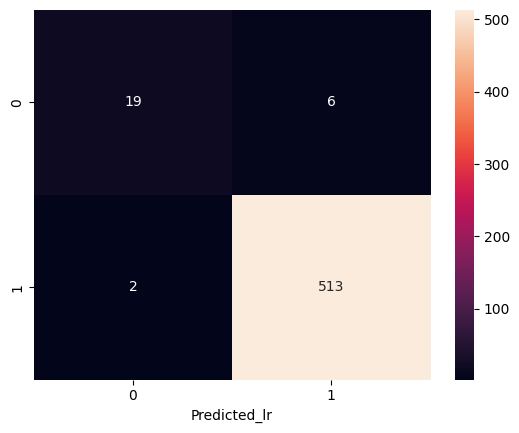

In [170]:
# 답안에 왜 로지스틱회귀모델에 대한 평가가 누락되었는가? 실제 시험에서는 모델 평가가 여러개 나온다.

# LogisticRegression 모델 평가
y_pred_lr = model_lr.predict(X_valid_scaled)
accuracy_lr = accuracy_score(y_valid, y_pred_lr)
f1_lr = f1_score(y_valid, y_pred_lr)
print(f'Logistic Regression - Accuracy: {accuracy_lr:.4f}, F1 Score: {f1_lr:.4f}')

# Confusion Matrix 출력
conf_mat_lr = confusion_matrix(y_valid, y_pred_lr)
print('Confusion Matrix:\n', conf_mat_lr)

# 혼동 행렬 시각화
sns.heatmap(conf_mat_lr, annot=True, fmt='d')
plt.xlabel('Predicted_lr')


--- 
#### **문제 11.**

이번에는 `AdaBoostClassifier` 모델을 사용하여 학습을 진행하려고 합니다. 아래 가이드에 따라 모델을 학습시키고, 검증 데이터셋(`X_valid_scaled`)에 대한 예측 결과를 `ada_pred` 변수에 저장하세요.

* `sklearn.ensemble`의 `AdaBoostClassifier` 함수 사용 (1번 문제에서 임포트)
* **하이퍼파라미터 설정**:
    * `n_estimators`: 50
    * `learning_rate`: 1.0
    * `random_state`: 2024
* 모델 객체는 `model_ada` 변수에 저장하고 학습시키세요.

In [171]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 11**


* **상세 해설**
  
    `AdaBoostClassifier`는 간단한 모델(주로 의사결정나무)을 순차적으로 학습시키면서, 이전 모델이 틀린 데이터에 더 큰 가중치를 부여하여 다음 모델이 그 데이터를 더 잘 맞추도록 하는 부스팅 앙상블 기법입니다. 문제에서 제시된 하이퍼파라미터로 모델 객체 `model_ada`를 생성하고 학습시킨 후, `.predict()`를 사용하여 검증 데이터에 대한 예측값을 `ada_pred`에 저장합니다.

In [172]:
# AdaBoostClassifier 모델 객체 생성
model_ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=seed_value)

# 모델 학습
model_ada.fit(X_train_scaled, y_train)

# 검증 데이터에 대한 예측 수행
ada_pred = model_ada.predict(X_valid_scaled)

--- 
#### **문제 12.**

앞서 학습한 `AdaBoostClassifier` 모델(`model_ada`)의 성능을 평가하려고 합니다. 분류 모델의 성능을 종합적으로 평가하는 지표인 **F1 Score**를 계산하고, **혼동 행렬(Confusion Matrix)** 을 시각화하는 코드를 작성하세요.

* `sklearn.metrics`에서 `f1_score`, `confusion_matrix` 함수를 import하세요.
* `model_ada`를 사용하여 예측 결과를 생성한 후, F1 Score를 계산하여 출력하세요.
* `seaborn`의 `heatmap`을 사용하여 혼동 행렬을 시각화하세요.

In [173]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 12**


* **상세 해설**
    * **F1 Score**: 정밀도(Precision)와 재현율(Recall)의 조화 평균으로, 두 지표가 모두 중요할 때 사용되는 종합적인 성능 지표입니다. 1에 가까울수록 좋습니다.
    * **혼동 행렬(Confusion Matrix)**: 모델의 예측 결과를 실제 값과 비교하여 표로 나타낸 것입니다. (TN, FP, FN, TP)를 통해 모델이 어떤 종류의 실수를 저지르는지 상세하게 분석할 수 있습니다. `heatmap`으로 시각화하면 결과를 더 쉽게 파악할 수 있습니다.

AdaBoostClassifier - Accuracy: 0.9815, F1 Score: 0.9903
Confusion Matrix:
 [[ 17   8]
 [  2 513]]


Text(0.5, 23.52222222222222, 'Predicted_ada')

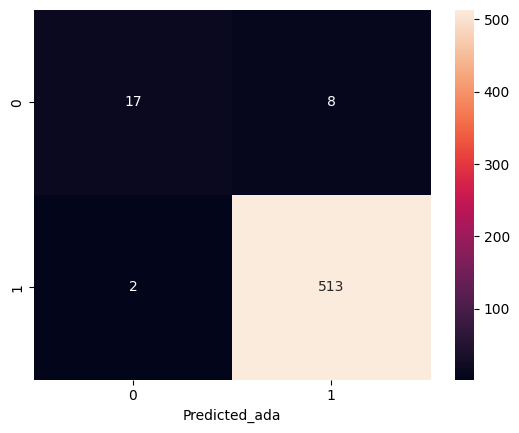

In [174]:
# F1 Score 계산
accuracy_ada = accuracy_score(y_valid, ada_pred)
f1_ada = f1_score(y_valid, ada_pred)
print(f'AdaBoostClassifier - Accuracy: {accuracy_ada:.4f}, F1 Score: {f1_ada:.4f}')

# 혼동 행렬 계산
cm = confusion_matrix(y_valid, ada_pred)
print('Confusion Matrix:\n', cm)

# 혼동 행렬 시각화
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted_ada')

# 혼동행렬을 히트맵으로 시각화(25년 10월 기출)
# 모델로부터 y_pred를 얻은 후 혼동행렬을 시각화 한다.
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_valid, y_pred)
# sns.heatmap(cm, annot=True, fmt='d')

--- 
#### **문제 13.**

이번에는 딥러닝을 사용하여 대출 승인 예측 모델을 만들려고 합니다. 아래의 가이드에 따라 `tensorflow.keras`를 사용하여 이진 분류 모델을 구축하고 학습시키세요.

* `Sequential` 모델을 사용하세요.
* **모델 구조**:
    * **입력층**: `Dense` 레이어, 16개 노드, 활성화 함수 `relu`
    * **은닉층 1**: `Dense` 레이어, 8개 노드, 활성화 함수 `relu`
    * **출력층**: `Dense` 레이어, **1개 노드**, 활성화 함수 **`sigmoid`**
* **컴파일 설정**:
    * `optimizer`: `adam`
    * `loss`: **`binary_crossentropy`**
    * `metrics`: `['accuracy']`
* **학습 설정**:
    * `epochs`: 20
    * `batch_size`: 64
    * `validation_data`로 `X_valid_scaled`, `y_valid`를 사용하여 검증 성능도 함께 확인하세요.
* 학습 과정은 `history` 변수에 저장하세요.

In [175]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 13**


* **상세 해설**
    이진 분류를 위한 딥러닝 모델은 회귀 모델과 몇 가지 중요한 차이점이 있습니다.
    * **출력층**: `Dense(1, activation='sigmoid')` - 예측할 결과가 0 또는 1이므로 노드는 1개이며, 출력값을 0과 1 사이의 확률로 바꾸어주는 `sigmoid` 활성화 함수를 사용합니다.
    * **손실 함수**: `loss='binary_crossentropy'` - 두 개의 클래스 간의 차이를 계산하는, 이진 분류 문제에 특화된 손실 함수를 사용합니다.

In [176]:
# 딥러닝 모델 설계
# 실제 시험은 Dropout 층도 추가해야 한다.

model_dl = Sequential([
    Dense(32, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    # Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)), 이렇게 써도 된다.
    Dropout(rate=0.1),
    Dense(16, activation='relu'),
    Dropout(rate=0.1),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

'''
model = Sequential()
model.add(Input((X_train.shape[1],)))   # keras recommend this
model.add(Dense(32, activation='relu'))
~
model.add(Dense(1, activation='sigmoid'))
이런 포맷으로 써도 된다.
'''

# 모델 컴파일
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 2025년 10월 시험 기출:
# 만약, 타겟을 원핫 인코딩 (softmax 2개 출력용으로 y 컬럼을 2개로 생성) 했다면,
# 즉, y = to_categorical(y, num_classes=2) 로 시험에서 주어졌다면(혹은 사용자가 그렇게 했다면)
# loss = 'categorical_crossentropy' 로 바꾸고
# 출력층 Dense(2, activation='softmax') 로 바꾸어야 한다.

# 시험에서는 Callback 도 반드시 물어본다.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[es, mc],     # 반드시 추가해야 한다!
    verbose=1
)

print("딥러닝 모델 학습 완료")
model_dl.evaluate(X_valid_scaled, y_valid)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9531 - loss: 0.2859 - val_accuracy: 0.9537 - val_loss: 0.1973
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1709 - val_accuracy: 0.9537 - val_loss: 0.1558
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1452 - val_accuracy: 0.9537 - val_loss: 0.1355
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1185 - val_accuracy: 0.9537 - val_loss: 0.1222
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1064 - val_accuracy: 0.9537 - val_loss: 0.1109
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.0923 - val_accuracy: 0.9537 - val_loss: 0.1025
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.0857 - val_accuracy: 0.9537 - val_loss: 0.0949
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.0771 - val_accuracy: 0.9537 - val_loss

[0.07512309402227402, 0.9722222089767456]

--- 
#### **문제 14.**

최종적으로 완성된 딥러닝 모델을 사용하여, 아래와 같은 새로운 고객 데이터가 들어왔을 때의 대출 승인 확률을 예측하려고 합니다. 주어진 시뮬레이션 데이터(`new_applicant_data`)를 **9번 문제에서 생성한 스케일러(`scaler`)를 사용하여 변환**한 뒤, 딥러닝 모델로 승인 확률을 예측하는 코드를 작성하세요.

* 예측 결과(확률값)는 `predicted_approval_prob` 변수에 저장하세요.

In [177]:
# 아래 코드를 실행하여 시뮬레이션용 데이터를 생성하세요.
new_applicant_data = np.array([[10000, 750, 5000, 150, 5, 1, 12, 0, 0, 0, 1, 0, 0, 0, 1]])

In [178]:
# 정정된 답안
# 시험문제가 쉽게 출제되면 위 처럼 전처리가 완료된 입력데이터를 제공한다.
# 그러나 여기서는 훈련데이터가 정정되었으므로 위 데이터는 사용하지 않는다.
# new_data 는 원래 문제의 훈련용 데이터에서 마지막 2줄을 추출하고 훈련용 데이터셋에서는 제거했다.
new_data = pd.read_csv('./9_loan_approval_predict.csv')

# new_data 데이터프레임에 대해 동일한 전처리 수행
# 1. 레이블 인코딩
new_data['delinquency_history'] = le.transform(new_data['delinquency_history'])

# 2. 원-핫 인코딩
new_data = pd.get_dummies(new_data)

# 3. 매우 중요한 스탭 : train 데이터의 컬럼과 new_data 의 컬럼이 갯수와 순서가 일치하도록 맞춰야 한다.
# 그래서, 시험문제에 예측용 new_data 값이 주어지면, 원핫인코딩되어있는지, 컬럼종류가 훈련데이터와 일치하는지 반드시 확인해야 한다!
# 여기서는 아래 명령으로 new_data에 부족한 컬럼이 있다면 추가하고 False 값으로 채운다.
# 또한 여기서 y값 컬럼도 삭제된다!
new_data = new_data.reindex(columns=X_train.columns, fill_value=False)
print(new_data.head())

   annual_income  credit_score  loan_amount    dti  years_employed  \
0         8270.0         719.0       6644.0  252.0             6.0   
1         8019.0         339.0       3847.0  470.0            26.0   

   delinquency_history  employment_type_계약직  employment_type_무직  \
0                    1                False               False   
1                    0                False                True   

   employment_type_자영업  employment_type_정규직  loan_purpose_기타  loan_purpose_사업  \
0                 True                False            False            False   
1                False                False            False             True   

   loan_purpose_생활비  loan_purpose_주택  home_ownership_월세  home_ownership_자가  \
0             False             True               True              False   
1             False            False              False              False   

   home_ownership_전세  
0              False  
1               True  


#### **[해설 및 핵심 이론] 문제 14**


* **상세 해설**
  
    새로운 데이터 `new_applicant_data`를 **반드시 9번 문제에서 훈련 데이터로 학습시킨 `scaler` 객체를 사용하여 `transform()`** 해야 합니다. 스케일링된 데이터를 학습된 딥러닝 모델의 `.predict()` 메소드에 입력하면, `sigmoid` 함수를 통해 0과 1 사이의 '승인 확률'이 예측됩니다.

In [179]:
# 1. 9번 문제의 scaler를 사용하여 새로운 데이터를 스케일링합니다.
#new_applicant_scaled = scaler.transform(new_applicant_data)
new_data_scaled = scaler.transform(new_data)

# 2. 딥러닝 모델로 승인 확률을 예측합니다.
print(model_dl.predict(new_data_scaled))
print(model_dl.predict(new_data_scaled)>0.5)
print((model_dl.predict(new_data_scaled)>0.5).astype(int))

# 즉, 첫번째 데이터의 예측 확률은 0.99 이므로 > 0.5 로 True (1)
# 두번째 데이터의 예측 확률은 0.35 이므로 < 0.5 로 False (0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.99786866]
 [0.353507  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[ True]
 [False]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1]
 [0]]


## 중요함
위 예제는 시그모이드 출력층과 binary_crossentropy 손실 함수를 사용하는 이진 분류 DNN 모델이다.

model.predict(X_test) > 0.5는 각 샘플의 예측 확률이 0.5보다 크면 True

.astype(int)는 boolean 값을 0 or 1 로 변환

예를 들어 predict 값이 [0.85, 0.11] 이면 [0] 이 반환됨.  즉, Negative 라는 의미로 해석


시험문제는 softmax 함수로 2개 output 출력하는 문제가 출제된다. 이때는

y_pred = np.argmax(model.predict(X_test), axis=1) 로 큰 값을 저장한다.  axis=1 은 컬럼방향 최대값 선택의 의미

np.argmax() : 행(axis=0) 또는 열(axis=1)을 따라 가장 큰 값(높은 확률)의 index 반환

예를 들어 [[0.15, 0.85], [0.89, 0.11] ] 이면 [1, 0] 이 반환됨.  즉, [Positive, Negative] 라는 의미로 해석하면 된다.

다중 클래스 분류(하나의 클래스 선택)와 달리, 다중 레이블 분류(여러 클래스 동시 선택 가능)에서는

softmax 대신 클래스별로 독립적인 sigmoid를 사용하고, binary_crossentropy를 적용해야 한다.

In [180]:
from tensorflow.keras.utils import to_categorical
y_c2 = to_categorical(y, num_classes=2)

# 훈련 데이터와 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y_c2, test_size=0.3, random_state=seed_value, stratify=y)

# 훈련 데이터에 fit_transform 적용
X_train_scaled = scaler.fit_transform(X_train)

# 검증 데이터에 transform 적용
X_valid_scaled = scaler.transform(X_valid)  # 주의 : 이것을 깜박하고 빼먹으면 대참사!

model_dl2 = Sequential([
    Dense(32, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dropout(rate=0.1),
    Dense(16, activation='relu'),
    Dropout(rate=0.1),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])

model_dl2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model2.keras', monitor='val_loss', save_best_only=True)

history = model_dl2.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[es, mc],
    verbose=1
)

print("딥러닝 모델 학습 완료(출력층 2개 : softmax)")
model_dl2.evaluate(X_valid_scaled, y_valid)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7091 - loss: 0.5905 - val_accuracy: 0.9537 - val_loss: 0.3517
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.2734 - val_accuracy: 0.9537 - val_loss: 0.2030
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1875 - val_accuracy: 0.9537 - val_loss: 0.1724
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9539 - loss: 0.1627 - val_accuracy: 0.9537 - val_loss: 0.1535
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1372 - val_accuracy: 0.9537 - val_loss: 0.1403
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1190 - val_accuracy: 0.9537 - val_loss: 0.1285
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9571 - loss: 0.1032 - val_accuracy: 0.9593 - val_loss: 0.1208
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9579 - loss: 0.0994 - val_accuracy: 0.9593 - val_loss:

[0.07258188724517822, 0.9722222089767456]

In [181]:
new_data_scaled = scaler.transform(new_data)

print(model_dl2.predict(new_data_scaled))
# 첫번째 데이터는 0, 1 중 1의 확률이 높다는 뜻.
# 두번째 데이터는 0, 1 중 0의 확률이 높다는 뜻.
# 즉, 첫번째 데이터는 Yes, 두번째 데이터는 No 로 예측되었다.

# 다양한 표현 방법을 보여주기 위한 코드
print(np.argmax(model_dl2.predict(new_data_scaled), axis=1))
print(np.argmax(model_dl2.predict(new_data_scaled), axis=1).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.00647355 0.99352646]
 [0.9506518  0.04934819]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[1 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1]
 [0]]


In [182]:
# 만약 y 값이 0,1 이 아니고 False,True 면 계산결과는 어떻게 될까?
y_tf = y.replace({0:False, 1:True})
print(y_tf.unique())
print(y_tf)

[ True False]
0       True
1       True
2       True
3       True
4       True
        ... 
1793    True
1794    True
1795    True
1796    True
1797    True
Name: loan_status, Length: 1798, dtype: bool


In [183]:
from tensorflow.keras.utils import to_categorical
y_c2 = to_categorical(y, num_classes=2)

# 훈련 데이터와 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y_c2, test_size=0.3, random_state=seed_value, stratify=y)

# 훈련 데이터에 fit_transform 적용
X_train_scaled = scaler.fit_transform(X_train)

# 검증 데이터에 transform 적용
X_valid_scaled = scaler.transform(X_valid)  # 주의 : 이것을 깜박하고 빼먹으면 대참사!

model_dl3 = Sequential([
    Dense(32, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dropout(rate=0.1),
    Dense(16, activation='relu'),
    Dropout(rate=0.1),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])

model_dl3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model3.keras', monitor='val_loss', save_best_only=True)

history = model_dl3.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[es, mc],
    verbose=1
)

print("딥러닝 모델 학습 완료(출력층 2개 : softmax)")
model_dl3.evaluate(X_valid_scaled, y_valid)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8124 - loss: 0.4782 - val_accuracy: 0.9519 - val_loss: 0.2781
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.2353 - val_accuracy: 0.9537 - val_loss: 0.1823
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1786 - val_accuracy: 0.9537 - val_loss: 0.1502
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1464 - val_accuracy: 0.9537 - val_loss: 0.1312
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1260 - val_accuracy: 0.9537 - val_loss: 0.1181
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1145 - val_accuracy: 0.9537 - val_loss: 0.1090
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1054 - val_accuracy: 0.9537 - val_loss: 0.1030
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.0957 - val_accuracy: 0.9537 - val_loss:

[0.06438034027814865, 0.9814814925193787]

In [184]:
new_data_scaled = scaler.transform(new_data)

print(model_dl3.predict(new_data_scaled))

print(np.argmax(model_dl3.predict(new_data_scaled), axis=1))
print(np.argmax(model_dl3.predict(new_data_scaled), axis=1).reshape(-1, 1))
# 마찬가지로 첫번째 데이터는 True, 두번째 데이터는 False 로 예측되었다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[6.9328782e-04 9.9930668e-01]
 [9.5908368e-01 4.0916327e-02]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[1 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1]
 [0]]
